<a href="https://colab.research.google.com/github/paulIruaRosero/Paul-Irua-Rosero-se-ales-y-sistemas/blob/main/Parcial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install sympy --upgrade #actualizar sympy para usar módulo de control


In [9]:
pip install control

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing()
#definiri variables
t, m, c, k = sym.symbols('t m c k', real=True,positive=True)
s = sym.symbols('s', complex=True)

Teniendo en cuenta la forma canónica:

$$H(s)=\frac{1}{a_2s^2+a_1s+a_0}$$

$$H(s)=K\frac{\omega_n^2}{s^2+2\xi \omega_ns+\omega_n^2}$$

In [11]:
#forma canónica del slit
a2 = m #CL en circuito equivalente
a1 = c #L/R en circuito equivalente
ao = k # 1 en circuito equivalente

Ko = 1/ao #ganancia circuito forma canónica
wn = sym.sqrt(ao/a2)
xi = a1/(2*a2*sym.sqrt(ao/a2))
#función de transferencia
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
H

       1        
────────────────
  ⎛c⋅s   k    2⎞
m⋅⎜─── + ─ + s ⎟
  ⎝ m    m     ⎠

In [12]:
#calcular polos
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1

                      _____________
                     ╱     2       
                    ╱     c        
        1.0⋅ⅈ⋅√k⋅  ╱   - ───── + 1 
   c             ╲╱      4⋅k⋅m     
- ─── + ───────────────────────────
  2⋅m               √m             

Ahora, para sistema subamortiguado:

$$0<\xi<1$$

$$0<\frac{a_1}{2 a_2 \sqrt{\frac {a_0} {a_2}}}<1$$

$$0<\frac{c}{2 m\sqrt{\frac {k} {m}}}<1$$

Asumimos:

$$c=1 = \frac{L}{R}$$

$L = 1$, $R=1$

$$k=1$$

$$m=4 = CL$$

$C=4$

$$\xi = \frac{1}{4}=0.25$$

In [15]:
#Reemplazando los valores
mck = {m: 4.0, c: 1.0, k: 1.0}
mck

{c: 1.0, k: 1.0, m: 4.0}

In [16]:
## Polos y ceros
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -0.125 + 0.484122918275927*I
p2= -0.125 - 0.484122918275927*I
xi= 0.250000000000000
omega_n= 0.500000000000000


#**Tiempo de establecimiento**

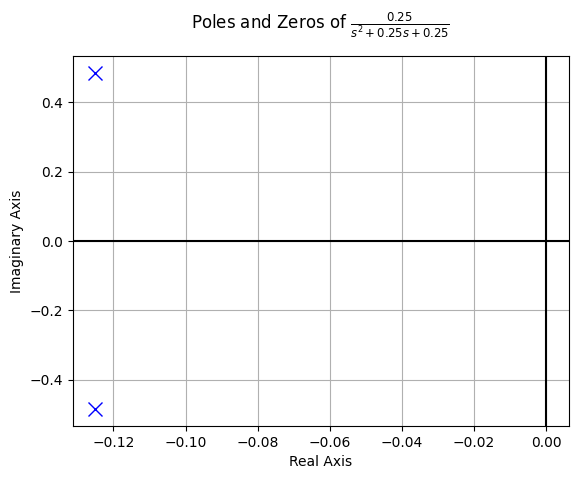

In [17]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot, ramp_response_plot
import control as ctrl
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

#**Diagrama de bode**

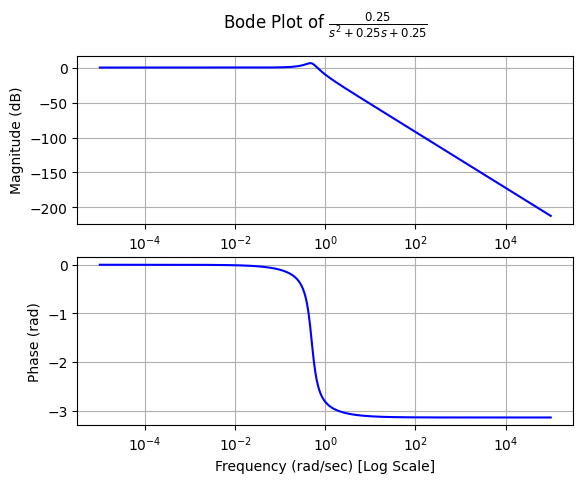

In [18]:
bode_plot(tf1)

#**Respuesta impulso**

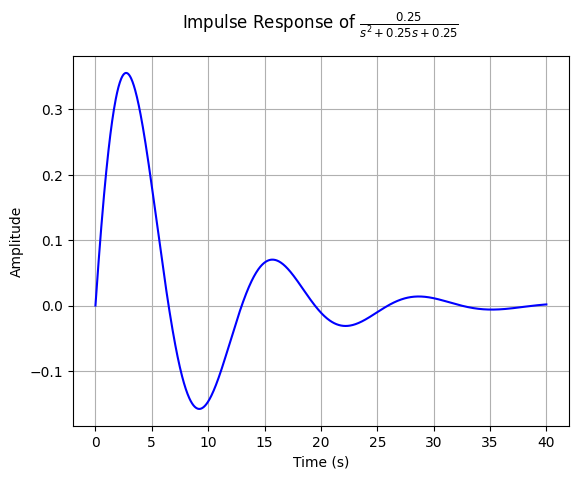

In [19]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

#**segundo punto del parcial**

descargar mp3 videos youtube

In [21]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━

In [23]:
import os #usar funcionalidades dependientes del sistema operativo
import yt_dlp as youtube_dl
#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

Link de la canción

In [24]:
link_= ['https://www.youtube.com/watch?v=O2lC_oBI7DU']
name_ = ['Feid']
for name,link in zip(name_,link_):
    print(name)
    download_ytvid_as_mp3(link,name)

Feid
[youtube] Extracting URL: https://www.youtube.com/watch?v=O2lC_oBI7DU
[youtube] O2lC_oBI7DU: Downloading webpage
[youtube] O2lC_oBI7DU: Downloading ios player API JSON
[youtube] O2lC_oBI7DU: Downloading web creator player API JSON
[youtube] O2lC_oBI7DU: Downloading player 26636eff
[youtube] O2lC_oBI7DU: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=O2lC_oBI7DU
[youtube] O2lC_oBI7DU: Downloading webpage
[youtube] O2lC_oBI7DU: Downloading ios player API JSON
[youtube] O2lC_oBI7DU: Downloading web creator player API JSON
[youtube] O2lC_oBI7DU: Downloading m3u8 information
[info] O2lC_oBI7DU: Downloading 1 format(s): 251
[download] Destination: Feid.mp3
[download] 100% of    2.81MiB in 00:00:00 at 10.17MiB/s  
Download complete... Feid.mp3


convertir mp3 a VAR

In [25]:
import subprocess

for name in name_:
    subprocess.call(['ffmpeg','-y', '-i', name+'.mp3',
                   name+'.wav'])


leer wav en numpy

In [26]:
!pip install soundfile

In [27]:
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio
#lee archivos wav
for name in name_:
    nombre_out = "output.wav"
    x, fs = sf.read(name+'.wav')

    print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,name+'.wav'))

Frecuencia de muestreo 48000.00[Hz]
audio Feid.wav


In [28]:
xpro = x.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

In [29]:
#reproducir fragmento original #señal mensaje
Audio(m,rate=fs)

simulaciones señal portadora y señal mensaje

In [30]:
Fc = 15000 #frecuencia de portadora
ts = 5 #t segmento
t = np.arange(0,ts,1/fs) #vector del tiempo
Im = 1 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = np.max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*t) #portadora

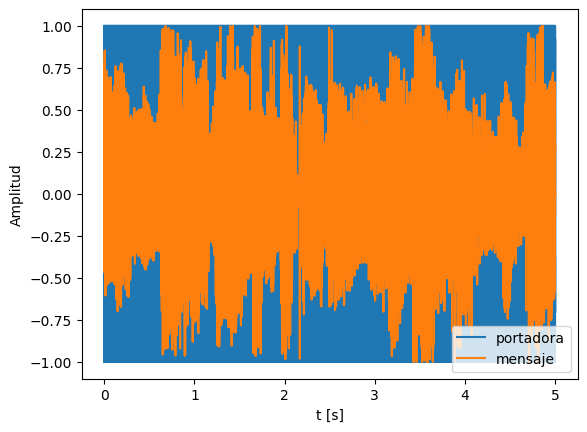

In [31]:
#Grafica señal portadora y señal mensaje en el tiempo
plt.plot(t,c,label='portadora')
plt.plot(t,m,label='mensaje')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

señal modulada en AM

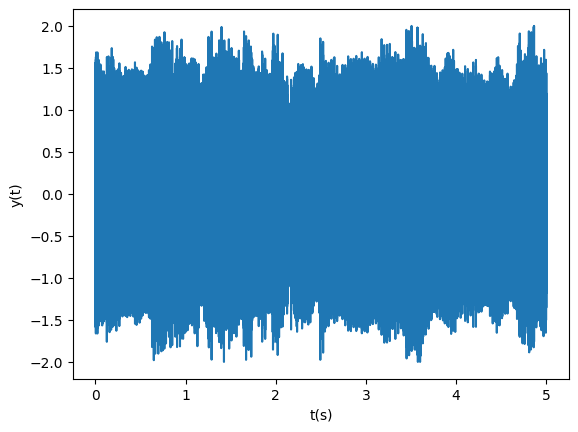

In [33]:
y = (1+m/Ac)*c #señal modulada en AM
plt.plot(t,y)
plt.xlabel('t(s)')
plt.ylabel('y(t)')
plt.show()

In [34]:
Audio(y,rate=fs) #reproducir modulada

señales en el dominio de la frecuencia

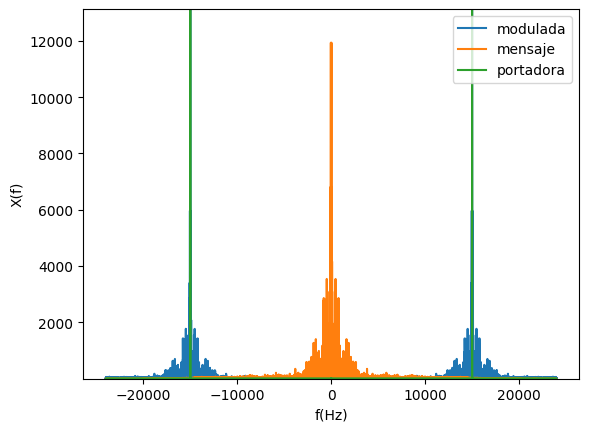

In [36]:
#calculo de espectros
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m)
Xfy = np.fft.fft(y)

vfre = np.fft.fftfreq(len(c),1/fs)

plt.plot(vfre,abs(Xfy),label='modulada')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('f(Hz)')
plt.ylabel('X(f)')
plt.ylim([np.min(abs(Xfm)), 1.1*np.max(abs(Xfm))])
plt.show()